# Titanic - Machine Learning Project

This project is part of my Data Science portfolio.  
The goal is to predict whether a passenger survived the Titanic disaster based on features such as age, gender, class, and other attributes.

**Steps of the project:**
1. Exploratory Data Analysis (EDA)
2. Data Cleaning & Feature Engineering
3. Model Training
4. Evaluation
5. Predictions on Test Data
6. Conclusion


## Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargamos data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Mostrar la data

In [5]:
train.shape

(891, 12)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## - Ver valores faltantes y tipos de datos

In [18]:
# Missing values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Data overview

- The dataset contains 891 rows and 12 columns.
- The target variable is **Survived** (0 = did not survive, 1 = survived).
- Some columns have missing values:
  - `Age` has ~20% missing values.
  - `Cabin` has many missing values (almost 80%).
  - `Embarked` has a few missing values.


## - Variables categóricas importantes

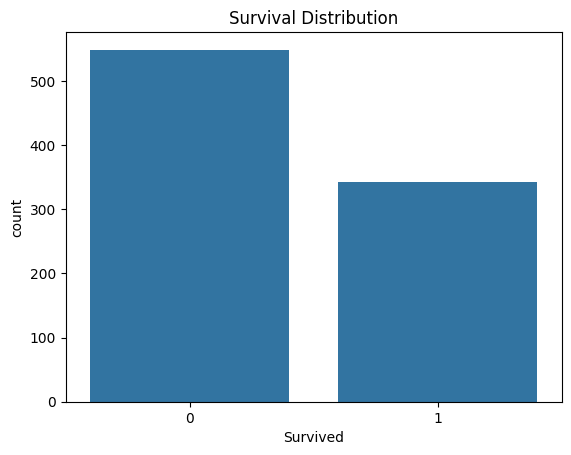

In [20]:
# Survival distribution
sns.countplot(x="Survived", data=train)
plt.title("Survival Distribution")
plt.show()

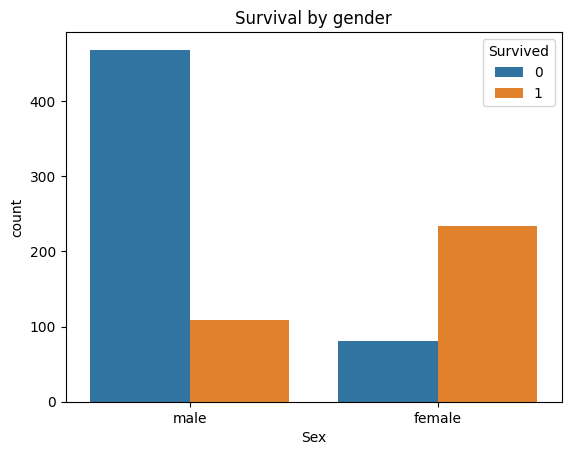

In [21]:
# Survival by gender
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Survival by gender")
plt.show()

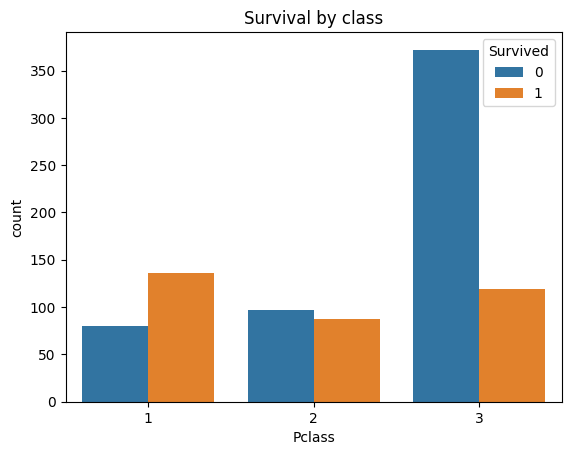

In [22]:
# Survival by class
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Survival by class")
plt.show()

## - Variables numéricas

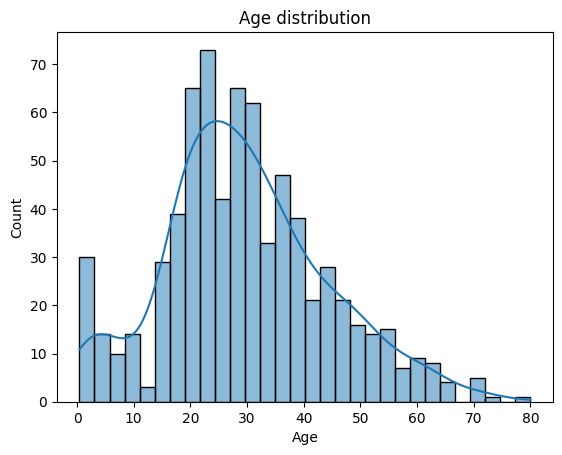

In [23]:
# Age distribution
sns.histplot(train["Age"].dropna(), kde=True, bins=30)
plt.title("Age distribution")
plt.show()

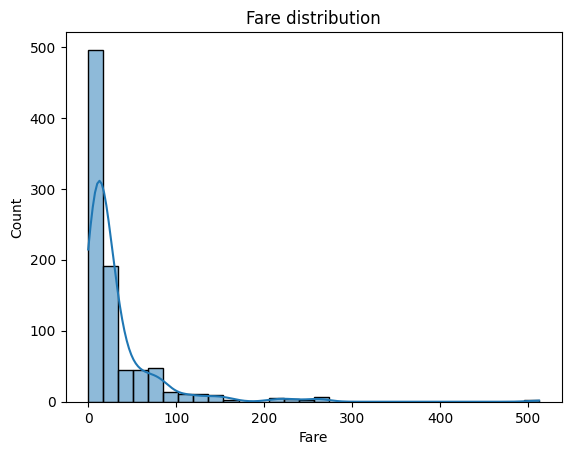

In [24]:
# Fare distribution
sns.histplot(train["Fare"], kde=True, bins=30)
plt.title("Fare distribution")
plt.show()

## EDA Findings

- Survival rate: ~38% survived and ~62% did not survive.
- Gender: Females had a much higher survival rate compared to males.
- Passenger Class: Passengers in 1st class had a better chance of survival, while 3rd class had the lowest.
- Age: Most passengers were between 20 and 40 years old.
- Fare: Most fares were low, but passengers with higher fares had a higher survival probability.


## - Data Cleaning & Feature Engineering

## Tratar valores nulos

In [28]:
# Fill missing Age with median
train["Age"] = train["Age"].fillna(train["Age"].median())

In [29]:
# Fill missing Embarked with most common value
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

In [30]:
# Drop Cabin column (too many missing values)
train.drop(columns=["Cabin"], inplace=True)

## Transformar variables categóricas

In [31]:
# Convert 'Sex' into numeric (0 = male, 1 = female)
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})

In [32]:
# One-hot encoding for 'Embarked'
train = pd.get_dummies(train, columns=["Embarked"], drop_first=True)

## Crear nuevas features útiles

In [33]:
# Family size (SibSp + Parch + self)
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

# IsAlone (binary feature)
train["IsAlone"] = 1  # assume alone
train.loc[train["FamilySize"] > 1, "IsAlone"] = 0

# Title extraction from Name
train["Title"] = train["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
train["Title"] = train["Title"].replace(
    ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare"
)
train["Title"] = train["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})

# Map titles to numeric
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train["Title"] = train["Title"].map(title_mapping)


## Eliminar columnas que ya no sirven

In [34]:
train.drop(columns=["Name", "Ticket", "PassengerId"], inplace=True)


## Revisar dataset final

In [35]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone,Title
0,0,3,0,22.0,1,0,7.2500,False,True,2,0,1
1,1,1,1,38.0,1,0,71.2833,False,False,2,0,3
2,1,3,1,26.0,0,0,7.9250,False,True,1,1,2
3,1,1,1,35.0,1,0,53.1000,False,True,2,0,3
4,0,3,0,35.0,0,0,8.0500,False,True,1,1,1


## Feature Engineering Summary

- Missing values handled:
  - Age → filled with median
  - Embarked → filled with most common value
  - Cabin → dropped (too many missing values)
- Converted categorical variables:
  - Sex → numeric
  - Embarked → one-hot encoded
- New features created:
  - FamilySize
  - IsAlone
  - Title (extracted from Name)
- Dropped irrelevant columns: Name, Ticket, PassengerId
